## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data quality check
*By Elton John*

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

***The code below shows the distribution of the different variables we worked with for our analysis by showing visualizations and describing the relevant distribution information (.describe)***

In [2]:
# downloading the dataset 
df = pd.read_csv('complete_dataset.csv')
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# df = df[df['date'].apply(lambda x: x.year)==2019].reset_index(drop=True)

Text(0.5, 0, 'Demand')

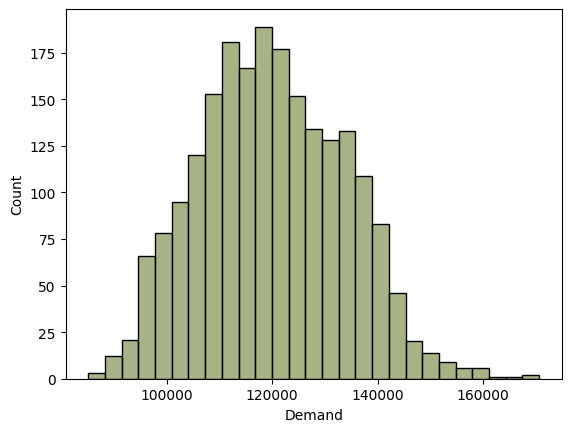

In [3]:
# distribution of demand data
sns.histplot(data=df['demand'], color='#8A9A5B')
plt.xlabel('Demand')

Text(0, 0.5, 'Demand')

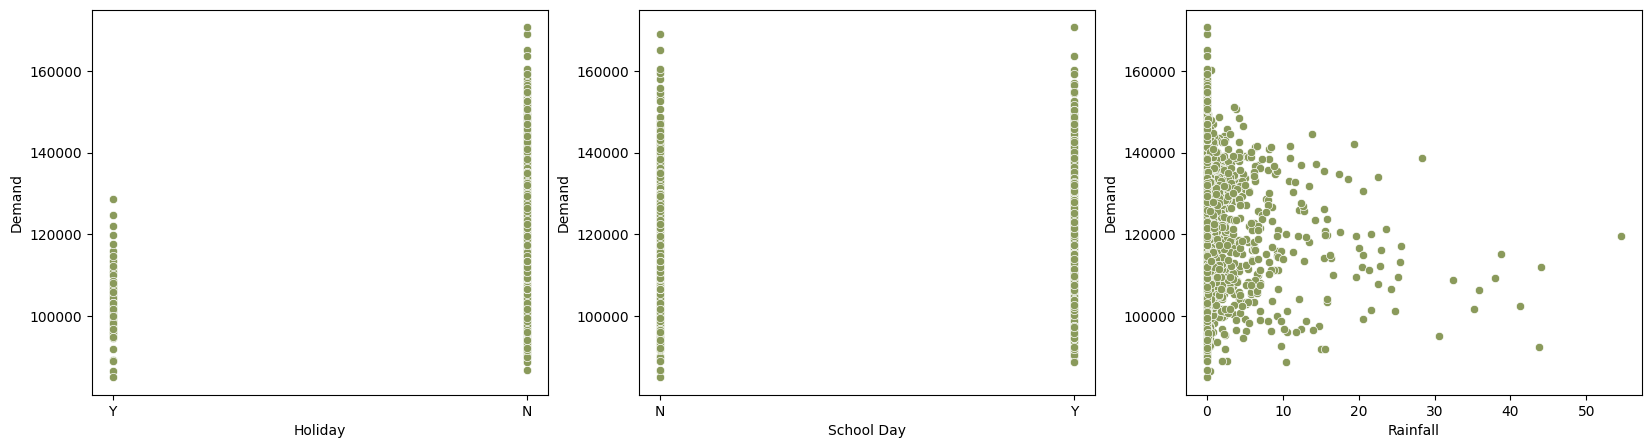

In [4]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='holiday', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Holiday')
plt.ylabel('Demand')

plt.subplot(1, 3, 2)
sns.scatterplot(x='school_day', y='demand', data=df, color='#8A9A5B')
plt.xlabel('School Day')
plt.ylabel('Demand')

plt.subplot(1, 3, 3)
sns.scatterplot(x='rainfall', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Rainfall')
plt.ylabel('Demand')

Text(0, 0.5, 'Demand')

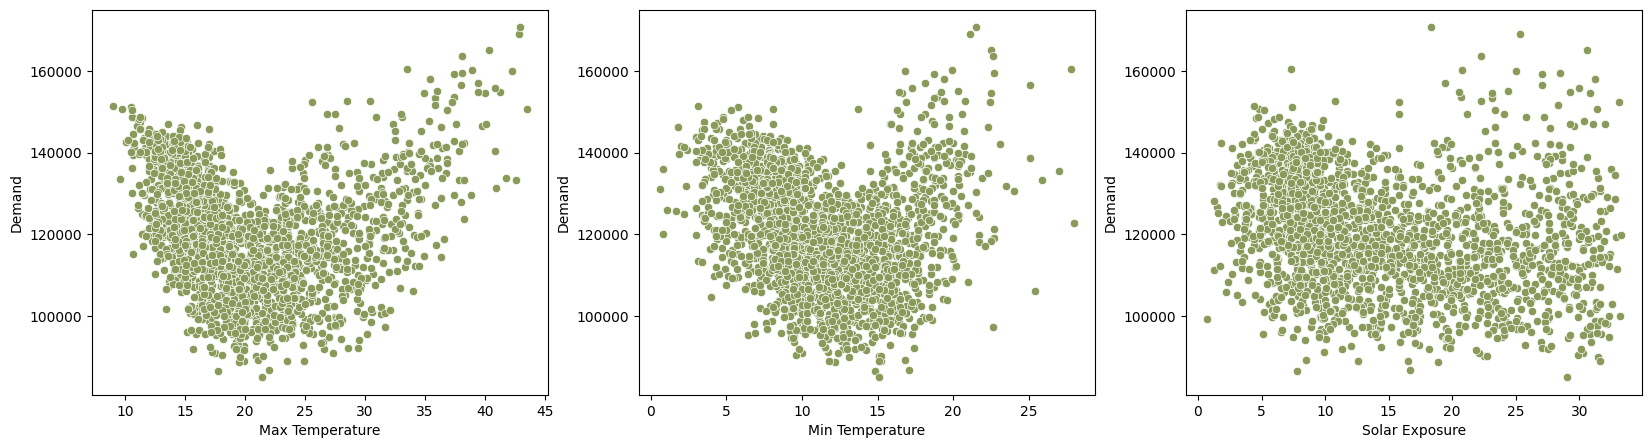

In [5]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='max_temperature', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Max Temperature')
plt.ylabel('Demand')

plt.subplot(1, 3, 2)
sns.scatterplot(x='min_temperature', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Min Temperature')
plt.ylabel('Demand')

plt.subplot(1, 3, 3)
sns.scatterplot(x='solar_exposure', y='demand', data=df, color='#8A9A5B')
plt.xlabel('Solar Exposure')
plt.ylabel('Demand')

In [6]:
print(df['max_temperature'].isnull().sum())
print(df['solar_exposure'].isnull().sum())

0
1


In [7]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


### Data cleaning
*By Xena Valenzuela*

From the data quality check we realized that:

1. There were 4 NA values in this dataset, 1 for solar_exposure and 3 for rainfall, so we imputed them with the means of their respective variables. For example, since the mean of df['solar_exposure'] is 14.74337292161519, we replaced the NA value of solar_exposure with 14.74337292161519.
2. n addition to imputing NA values, we changed the values of'school_day' and 'holiday' ('N' and 'Y') to a binary of 0 and 1 so that they could be added to our regression model.

The code below implements the above cleaning.

In [9]:
# Changing values to more easily fit by changing to 1s and 0s instead of Y or N
df['school_day'] = df['school_day'].apply(lambda x: 1 if x == 'Y' else 0)
df['holiday'] = df['holiday'].apply(lambda x: 1 if x == 'Y' else 0)

In [10]:
# 4 NAN values that were imputed
print(df['solar_exposure'].mean())
df.at[1060, 'solar_exposure']=14.74337292161519

print(df['rainfall'].mean())
df.at[161, 'rainfall']=1.505943889681408
df.at[1377, 'rainfall']=1.505943889681408
df.at[1378, 'rainfall']=1.505943889681408

14.743372921615203
1.5059438896814075


### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [11]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [12]:
######-----------Shuffling the dataset for K-fold------------#########

In [13]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

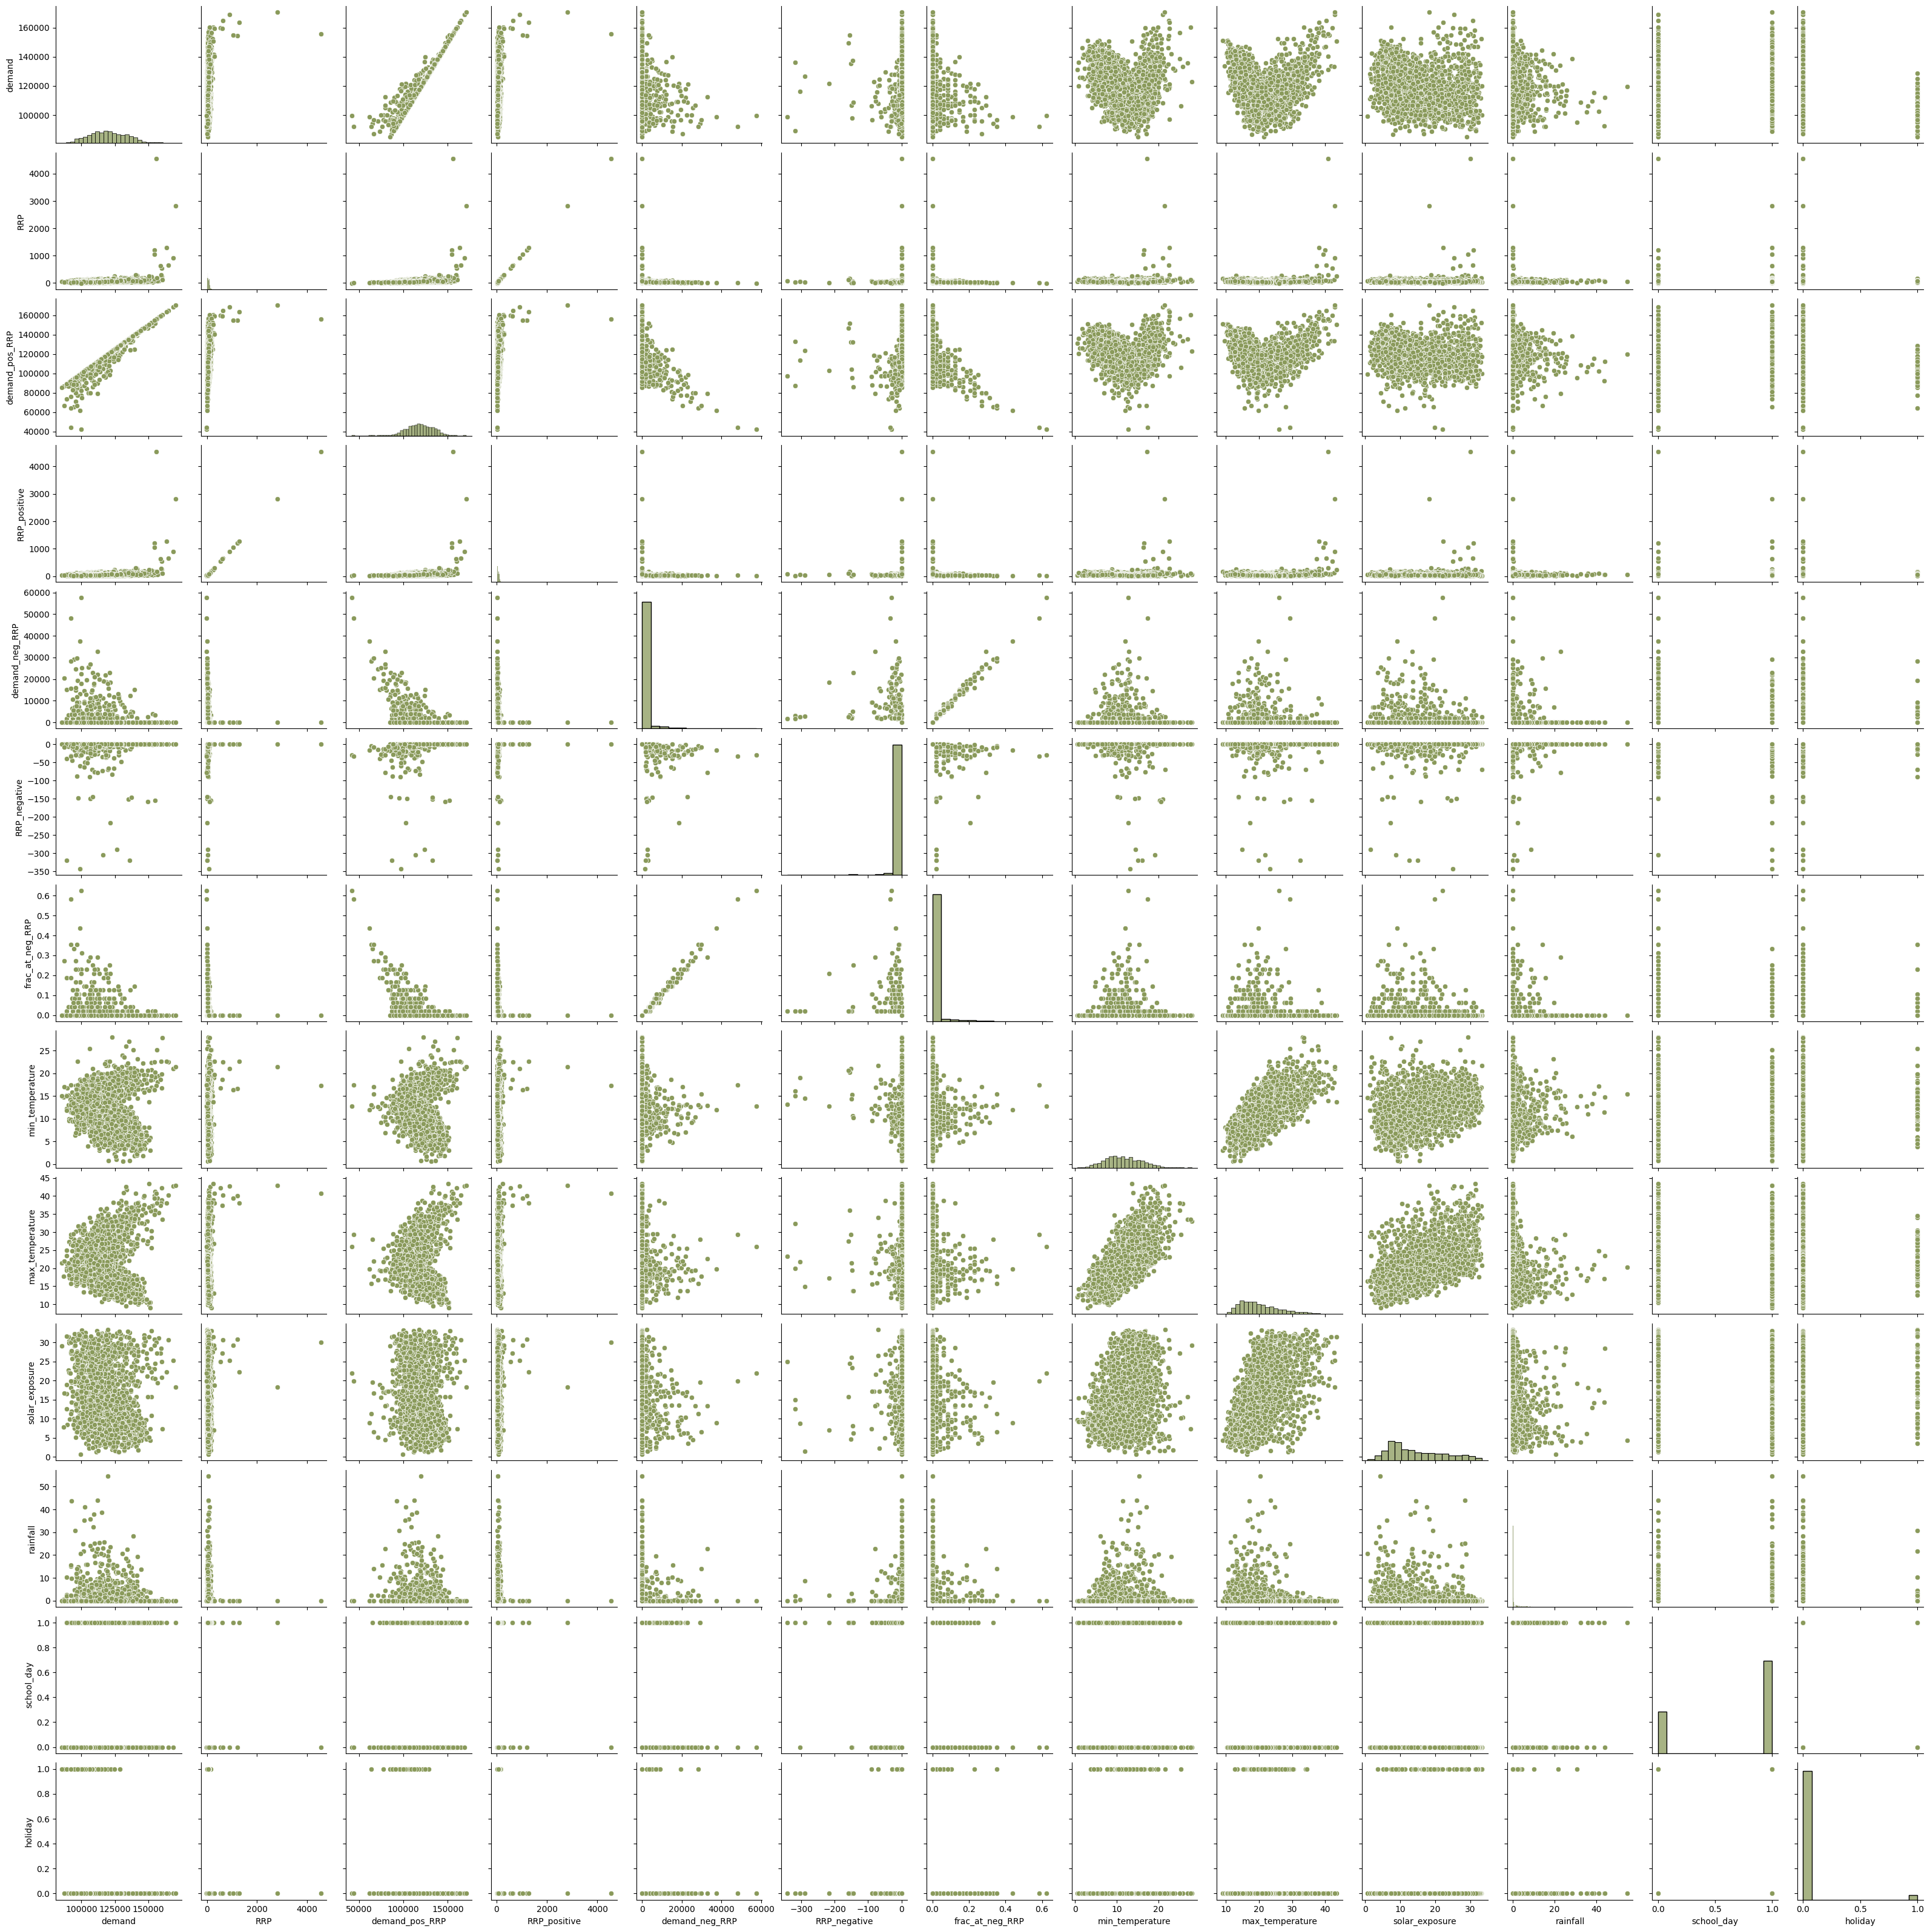

In [23]:
# Make pairplot of the dataframe to explore relationships between variables
sns.pairplot(df, plot_kws={'color':'#8A9A5B'}, diag_kws={'color':'#8A9A5B'})

- ***There is an obvious quadratic relationship between demand and min_temperature and demand and max_temperature***
- ***It seems that solar_exposure might also have a quadratic relationship with demand, but a residual plot should be graphed to confirm***
- ***Whether rainfall, school_day, and/or holiday have an effect on demand is unclear. They should be included in the first model so that we can check their p-values.***

Text(0, 0.5, 'Demand')

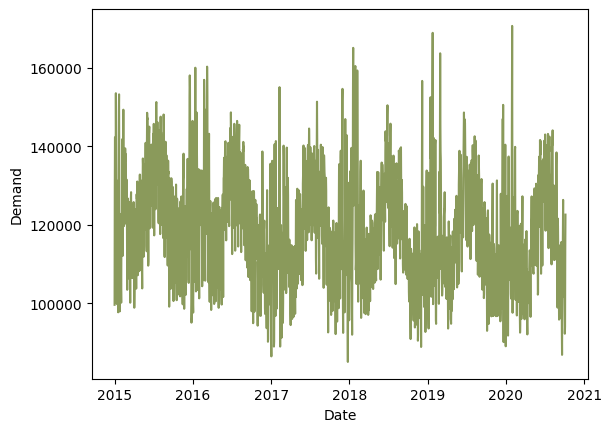

In [24]:
# Looking at relationship between date and demand
sns.lineplot(x='date', y='demand', data=df, color = '#8A9A5B')
plt.xlabel('Date')
plt.ylabel('Demand')

- ***The repeating patterns in the lineplot of demand against date indicate autocorrelation.***

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF

X = df[['max_temperature', 'min_temperature', 'solar_exposure', 'holiday', 'rainfall']]
X = add_constant(X, has_constant='add')
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

for i in range(len(X.columns)):
    X.columns[i]
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

           feature        VIF
0            const  12.478907
1  max_temperature   2.768200
2  min_temperature   2.056258
3   solar_exposure   1.571803
4          holiday   1.005603
5         rainfall   1.050010


- ***All of the values of VIF are close to 1, so we do not need to be concerned about multicollinearity in our model.***

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [15]:
# model 1 : multiple linear regression with max temp, min temp, solar exposure, school_day, and holiday
ols_object = smf.ols(formula = 'demand~max_temperature+min_temperature+solar_exposure+school_day+holiday+rainfall', data = df)
model1 = ols_object.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     69.55
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.46e-79
Time:                        13:26:17   Log-Likelihood:                -22864.
No. Observations:                2106   AIC:                         4.574e+04
Df Residuals:                    2099   BIC:                         4.578e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.235e+05   1094.925    1

Text(0, 0.5, 'Residuals')

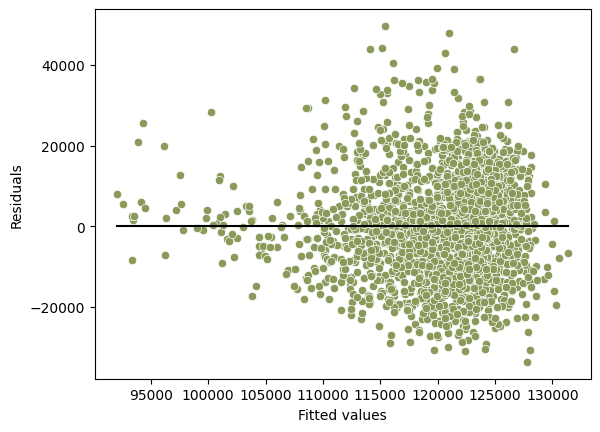

In [17]:
# Plotting residuals against fitted values
sns.scatterplot(x=model1.fittedvalues, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[model1.fittedvalues.min(), model1.fittedvalues.max()], y=[0,0], color='black')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

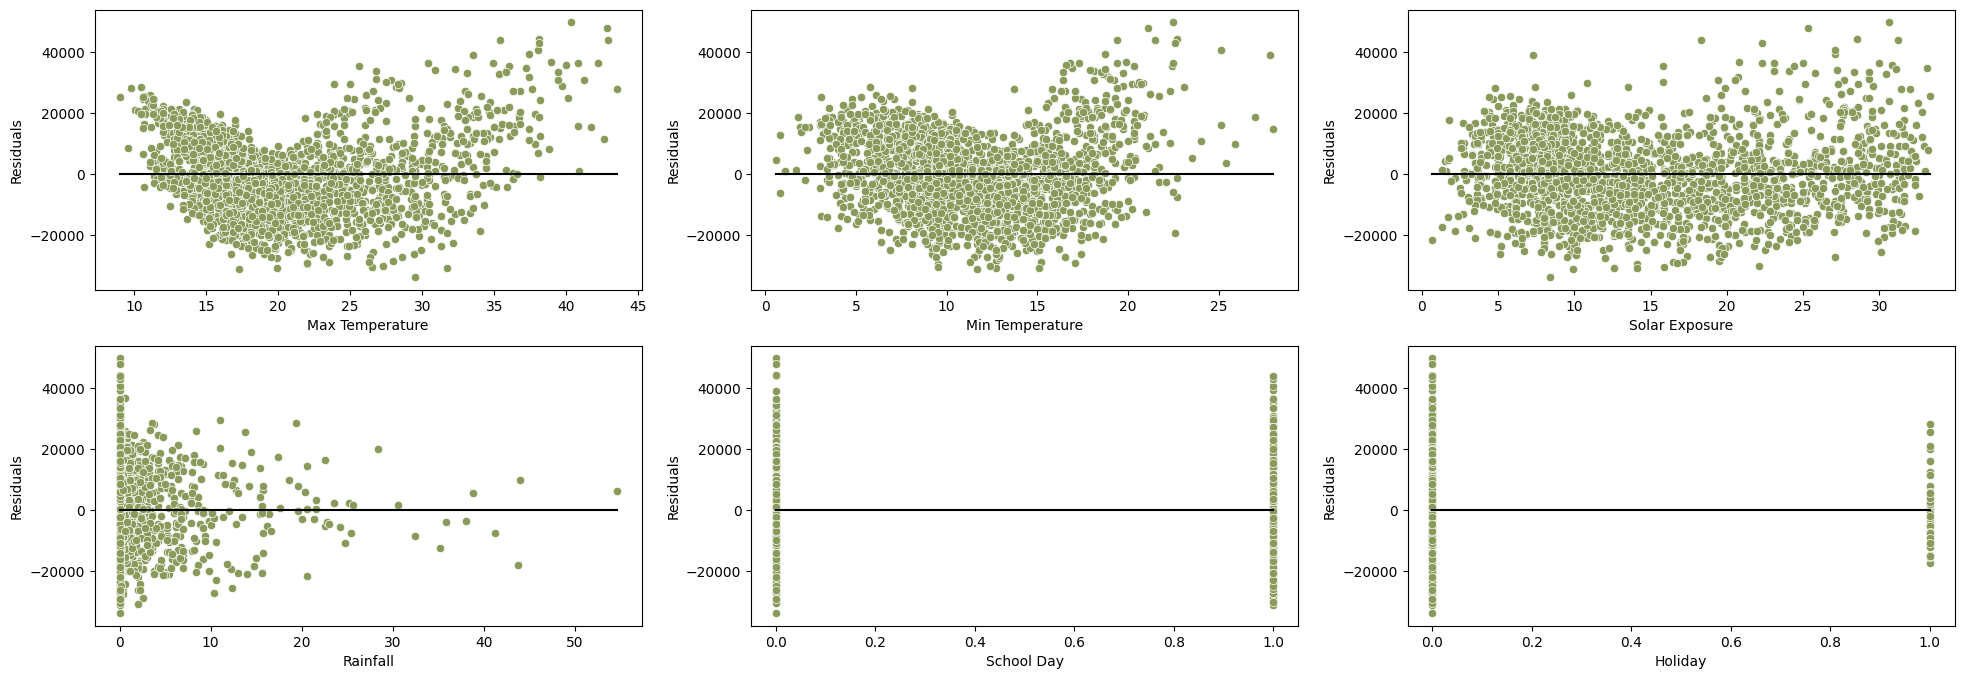

In [18]:
# Visualizing residuals against all the independent variables
fig = plt.figure(figsize=(24, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x=df.max_temperature, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='black')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 2)
sns.scatterplot(x=df.min_temperature, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='black')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 3)
sns.scatterplot(x=df.solar_exposure, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.solar_exposure.min(), df.solar_exposure.max()], y=[0,0], color='black')
plt.xlabel('Solar Exposure')
plt.ylabel('Residuals')

plt.subplot(2, 3, 4)
sns.scatterplot(x=df.rainfall, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.rainfall.min(), df.rainfall.max()], y=[0,0], color='black')
plt.xlabel('Rainfall')
plt.ylabel('Residuals')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df.school_day, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.school_day.min(), df.school_day.max()], y=[0,0], color='black')
plt.xlabel('School Day')
plt.ylabel('Residuals')

plt.subplot(2, 3, 6)
sns.scatterplot(x=df.holiday, y=model1.resid, color = '#8A9A5B')
sns.lineplot(x=[df.holiday.min(), df.holiday.max()], y=[0,0], color='black')
plt.xlabel('Holiday')
plt.ylabel('Residuals')

### This first model 1 allowed us to realized the following:
- The model was y heteroscedastic
- Both our max temperature and min temperature variables were quadratic
- So was the solar exposure variable (quadratic)

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [28]:
# model2 : np.log(y) to resovle heterscedasticity
ols_object = smf.ols(formula = 'np.log(demand)~max_temperature+I(max_temperature**2)+min_temperature+I(min_temperature**2)+solar_exposure+I(solar_exposure**2)+school_day+holiday+rainfall', data = df)
model2 = ols_object.fit()
print(model2.summary())

pred_demand = model2.predict(df)
print(np.sqrt((df['demand']-pred_demand)**2).mean())

                            OLS Regression Results                            
Dep. Variable:         np.log(demand)   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          1.33e-297
Time:                        13:46:33   Log-Likelihood:                 2275.3
No. Observations:                2106   AIC:                            -4531.
Df Residuals:                    2096   BIC:                            -4474.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Text(0, 0.5, 'Residuals')

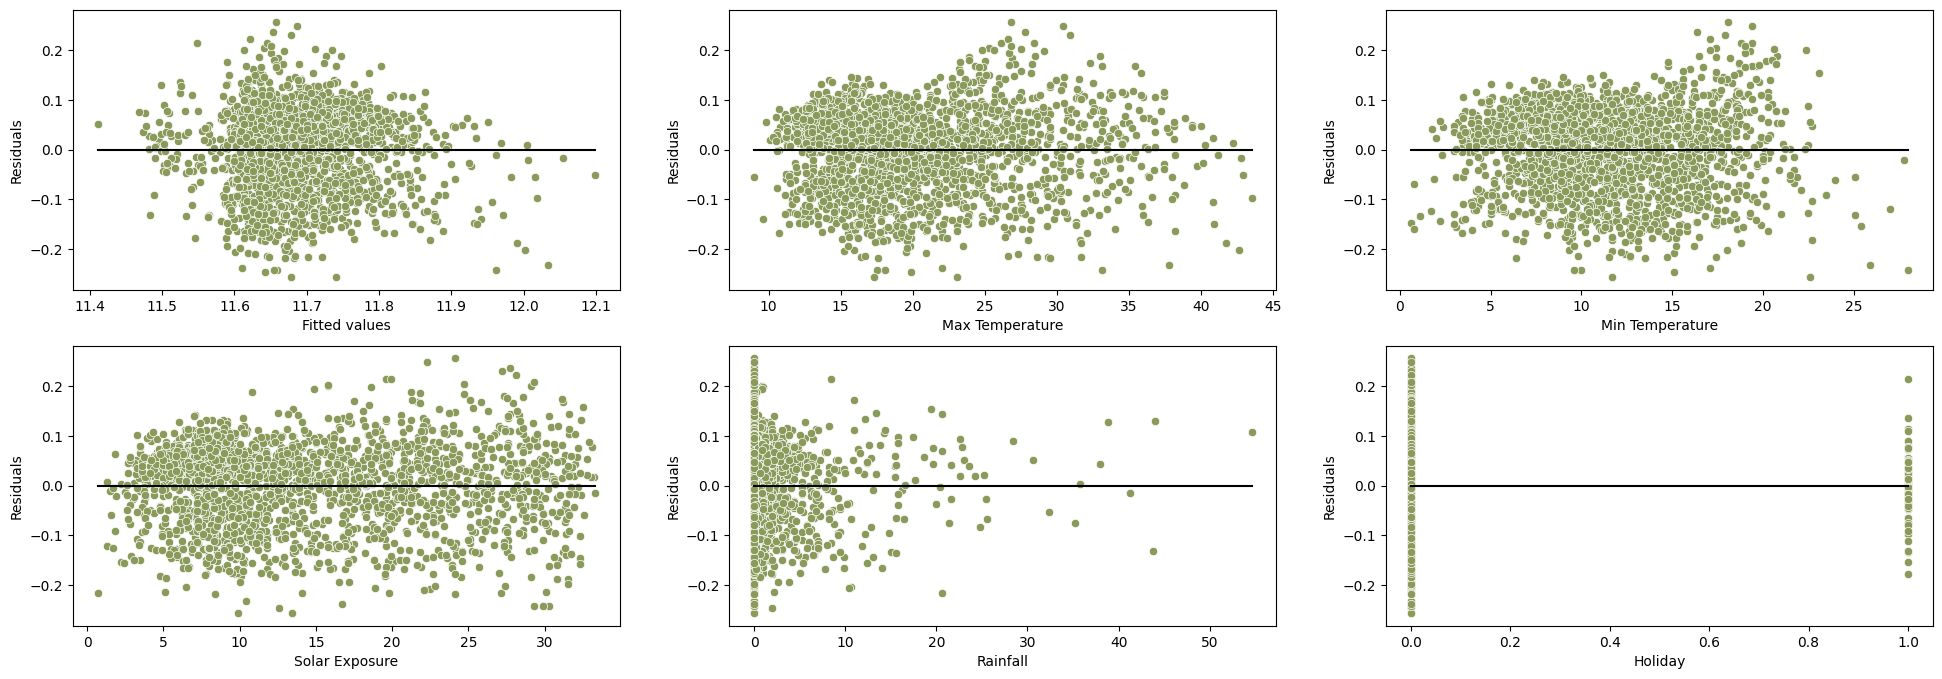

In [29]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x=model2.fittedvalues, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[model2.fittedvalues.min(), model2.fittedvalues.max()], y=[0,0], color='black')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.subplot(2, 3, 2)
sns.scatterplot(x=df.max_temperature, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.max_temperature.min(), df.max_temperature.max()], y=[0,0], color='black')
plt.xlabel('Max Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 3)
sns.scatterplot(x=df.min_temperature, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.min_temperature.min(), df.min_temperature.max()], y=[0,0], color='black')
plt.xlabel('Min Temperature')
plt.ylabel('Residuals')

plt.subplot(2, 3, 4)
sns.scatterplot(x=df.solar_exposure, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.solar_exposure.min(), df.solar_exposure.max()], y=[0,0], color='black')
plt.xlabel('Solar Exposure')
plt.ylabel('Residuals')

plt.subplot(2, 3, 5)
sns.scatterplot(x=df.rainfall, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.rainfall.min(), df.rainfall.max()], y=[0,0], color='black')
plt.xlabel('Rainfall')
plt.ylabel('Residuals')

plt.subplot(2, 3, 6)
sns.scatterplot(x=df.holiday, y=model2.resid, color = '#8A9A5B')
sns.lineplot(x=[df.holiday.min(), df.holiday.max()], y=[0,0], color='black')
plt.xlabel('Holiday')
plt.ylabel('Residuals')

### Model 2 conclusions: 
- Our R-squared significantly better
- The residual plots indicate that linear assumptions have been satisfied

### Autocorrelation Section

Besides all of the code above, we also conducted autocorrelation to see if adding lag better furthered our results